In [ ]:
import pandas as pd

In [ ]:
accounts=pd.read_csv('accounts.csv')

In [ ]:
accounts

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN
...,...,...,...,...,...,...,...
80,Zathunicon,retail,2010,71.12,144,United States,NaN
81,Zencorporation,technolgy,2011,40.79,142,China,NaN
82,Zoomit,entertainment,1992,324.19,978,United States,NaN
83,Zotware,software,1979,4478.47,13809,United States,NaN


In [ ]:
#overview of dataframe
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB


In [ ]:
#check missing values/null/nan
accounts.isnull().sum()

,0
account,0
sector,0
year_established,0
revenue,0
employees,0
office_location,0
subsidiary_of,70


In [ ]:
#remove null column
accounts.drop('subsidiary_of', axis=1, inplace=True)
accounts

,account,sector,year_established,revenue,employees,office_location
0,Acme Corporation,technolgy,1996,1100.04,2822,United States
1,Betasoloin,medical,1999,251.41,495,United States
2,Betatech,medical,1986,647.18,1185,Kenya
3,Bioholding,medical,2012,587.34,1356,Philipines
4,Bioplex,medical,1991,326.82,1016,United States
...,...,...,...,...,...,...
80,Zathunicon,retail,2010,71.12,144,United States
81,Zencorporation,technolgy,2011,40.79,142,China
82,Zoomit,entertainment,1992,324.19,978,United States
83,Zotware,software,1979,4478.47,13809,United States


In [ ]:
products=pd.read_csv('products.csv')

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product      7 non-null      object
 1   series       7 non-null      object
 2   sales_price  7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 300.0+ bytes


In [ ]:
products.isnull().sum()

,0
product,0
series,0
sales_price,0


In [ ]:
sales_teams=pd.read_csv('sales_teams.csv')

In [ ]:
sales_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sales_agent      35 non-null     object
 1   manager          35 non-null     object
 2   regional_office  35 non-null     object
dtypes: object(3)
memory usage: 972.0+ bytes


In [ ]:
sales_teams.isnull().sum()

,0
sales_agent,0
manager,0
regional_office,0


In [ ]:
sales_pipeline=pd.read_csv('sales_pipeline.csv')

In [ ]:
sales_pipeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   opportunity_id  8800 non-null   object 
 1   sales_agent     8800 non-null   object 
 2   product         8800 non-null   object 
 3   account         7375 non-null   object 
 4   deal_stage      8800 non-null   object 
 5   engage_date     8300 non-null   object 
 6   close_date      6711 non-null   object 
 7   close_value     6711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


In [ ]:
sales_pipeline.isnull().sum()

,0
opportunity_id,0
sales_agent,0
product,0
account,1425
deal_stage,0
engage_date,500
close_date,2089
close_value,2089


In [ ]:
key_cols={
    'account':[sales_pipeline,accounts],
    'product':[sales_pipeline,products],
    'sales_agent':[sales_pipeline,sales_teams]
}
for key, dfs in key_cols.items():
    for df in dfs:
        # Check if the column exists before trying to clean it
        if key in df.columns:
            df[key] = df[key].str.strip().str.lower()

In [ ]:
#Clean the join key columns in all tables
sales_pipeline.dropna(subset=['account'], inplace=True)
closed_stages = ['Won', 'Lost']
open_stages = ['Engaging', 'Prospecting']

#Split the pipeline into 'open' and 'closed' deals
closed_deals=sales_pipeline[sales_pipeline['deal_stage'].isin(closed_stages)].copy()
open_deals = sales_pipeline[sales_pipeline['deal_stage'].isin(open_stages)].copy()

#Remove duplicates from lookup tables ---
accounts.drop_duplicates(subset=['account'], inplace=True)
products.drop_duplicates(subset=['product'], inplace=True)
sales_teams.drop_duplicates(subset=['sales_agent'], inplace=True)

#JOIN TABLES FOR CLOSED DEALS
master_closed=pd.merge(closed_deals,accounts, on='account', how='left')
master_closed=master_closed.merge(products, on='product', how='left')
master_closed=master_closed.merge(sales_teams, on='sales_agent', how='left')
master_closed.to_csv('master_closed.csv', index=False)

#join tables for open deals
master_open=pd.merge(open_deals,accounts, on='account', how='left')
master_open=master_open.merge(products, on='product', how='left')
master_open=master_open.merge(sales_teams, on='sales_agent', how='left')
master_open.to_csv('master_open.csv', index=False)



In [ ]:
#FEATURE ENGINEERING (Creating new columns for analysis)
# Convert date columns to datetime objects
master_closed['engage_date'] = pd.to_datetime(master_closed['engage_date'])
master_closed['close_date'] = pd.to_datetime(master_closed['close_date'])

# Calculate sales cycle in days
master_closed['sales_cycle_days'] = (master_closed['close_date'] - master_closed['engage_date']).dt.days

# Filter for 'Won' deals for revenue-specific analysis
won = master_closed[master_closed['deal_stage'] == 'Won'].copy()

# Calculate Deal Velocity for won deals
# We add 1 to the cycle days to avoid division by zero for same-day deals
won['deal_velocity'] = won['close_value'] / (won['sales_cycle_days'] + 1)
print("Created 'sales_cycle_days' and 'deal_velocity' columns.\n")

Created 'sales_cycle_days' and 'deal_velocity' columns.



In [ ]:
# 1 OVERALL SALES PERFORMANCE ANALYSIS
# Overall Win Rate
total_closed_deals = len(master_closed)
total_won_deals = len(won)
win_rate = (total_won_deals / total_closed_deals) * 100
print(f"\nOverall Win Rate: {win_rate:.2f}% ({total_won_deals} wins out of {total_closed_deals} closed deals)")

# Average Deal Size for Won Opportunities
avg_deal_size = won['close_value'].mean()
print(f"Average Deal Size (Won): ${avg_deal_size:,.2f}")

# Average Sales Cycle
avg_sales_cycle = master_closed['sales_cycle_days'].mean()
print(f"Average Sales Cycle: {avg_sales_cycle:.2f} days")

# Revenue Trend Over Time (by month)
won['close_month'] = won['close_date'].dt.to_period('M')
monthly_revenue = won.groupby('close_month')['close_value'].sum()
print("\n--- Monthly Revenue Trend ---")
print(monthly_revenue)



Overall Win Rate: 63.15% (4238 wins out of 6711 closed deals)
Average Deal Size (Won): $2,360.91
Average Sales Cycle: 47.99 days

--- Monthly Revenue Trend ---
close_month
2017-03    1134672.0
2017-04     721932.0
2017-05    1025713.0
2017-06    1338466.0
2017-07     696932.0
2017-08    1050059.0
2017-09    1235264.0
2017-10     731980.0
2017-11     938943.0
2017-12    1131573.0
Freq: M, Name: close_value, dtype: float64


/tmp/ipython-input-652063850.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_loss_counts.index, y=win_loss_counts.values, palette=['#34A853', '#EA4335'])


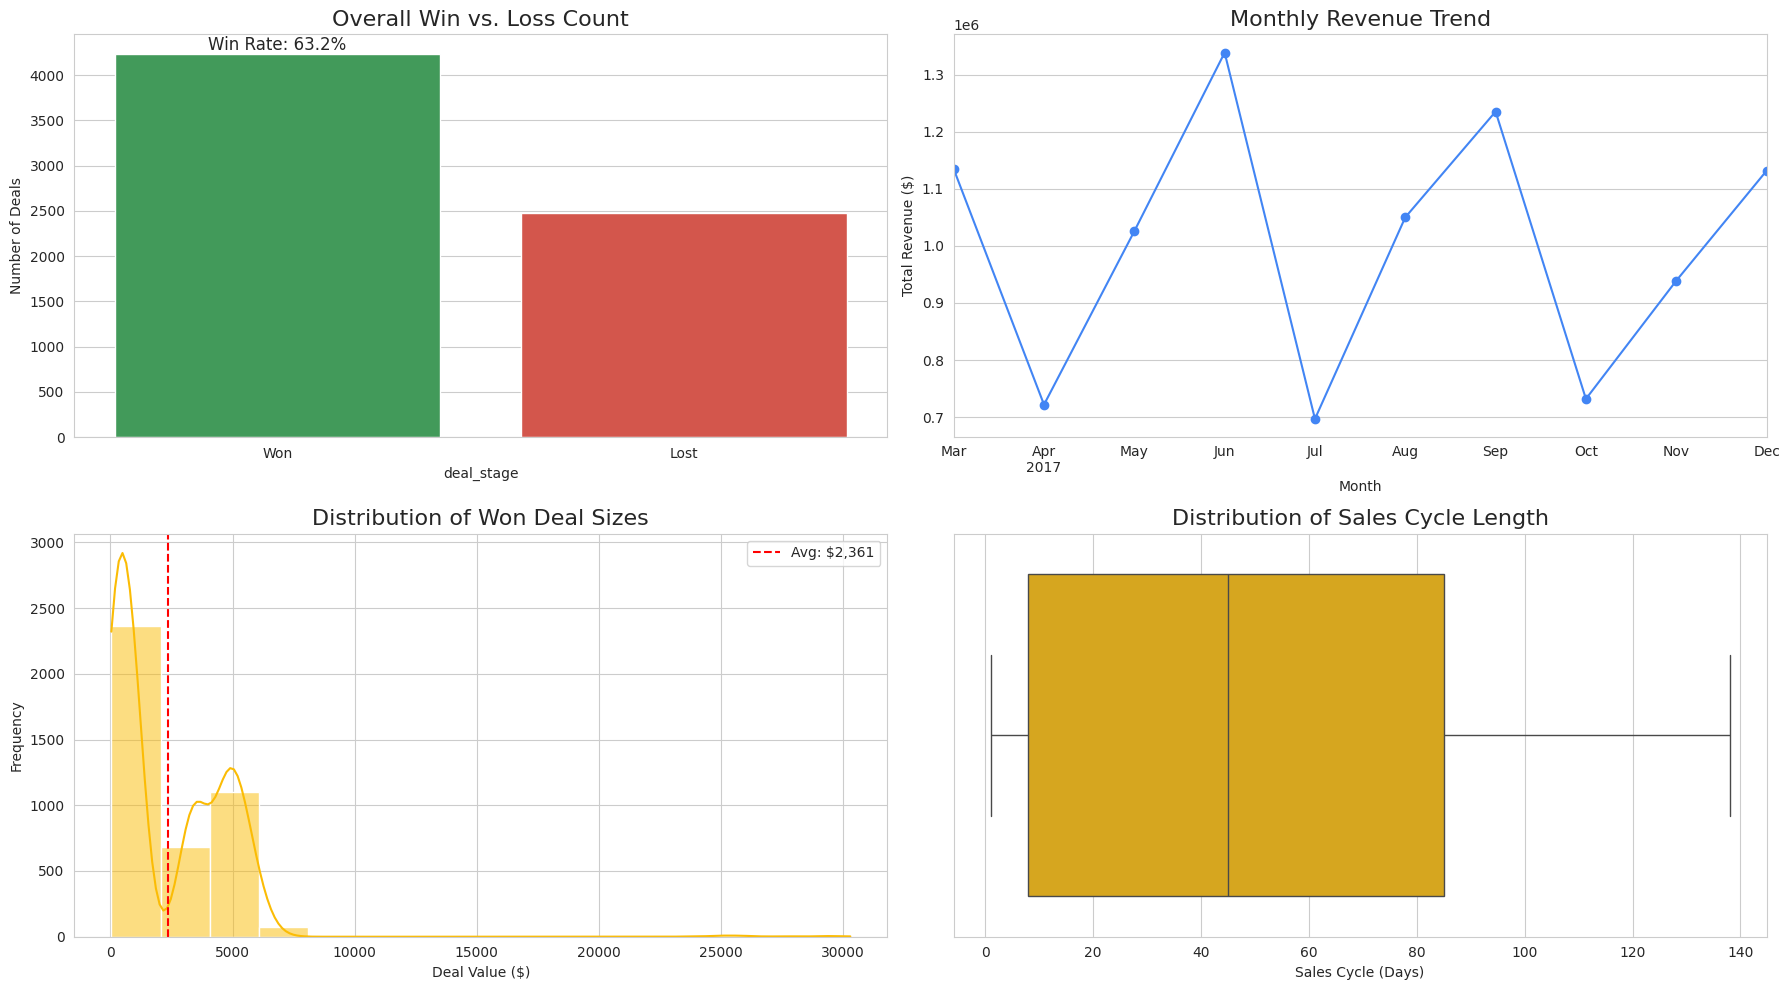

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Visualizations ---
# Set a professional style for the plots
sns.set_style("whitegrid")
plt.figure(figsize=(18, 10)) # Create a figure to hold all subplots

# 1. Win Rate Visualization (Bar Chart)
plt.subplot(2, 2, 1) # (2 rows, 2 columns, 1st plot)
win_loss_counts = master_closed['deal_stage'].value_counts()
sns.barplot(x=win_loss_counts.index, y=win_loss_counts.values, palette=['#34A853', '#EA4335'])
plt.title('Overall Win vs. Loss Count', fontsize=16)
plt.ylabel('Number of Deals')
plt.text(0, win_loss_counts['Won'], f'Win Rate: {win_rate:.1f}%', ha='center', va='bottom', fontsize=12)


# 2. Monthly Revenue Trend (Line Chart)
plt.subplot(2, 2, 2) # (2 rows, 2 columns, 2nd plot)
monthly_revenue.plot(kind='line', marker='o', color='#4285F4')
plt.title('Monthly Revenue Trend', fontsize=16)
plt.ylabel('Total Revenue ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)


# 3. Distribution of Deal Sizes (Histogram)
plt.subplot(2, 2, 3) # (2 rows, 2 columns, 3rd plot)
sns.histplot(won['close_value'], kde=True, color='#FBBC05', bins=15)
plt.axvline(avg_deal_size, color='red', linestyle='--', label=f'Avg: ${avg_deal_size:,.0f}')
plt.title('Distribution of Won Deal Sizes', fontsize=16)
plt.xlabel('Deal Value ($)')
plt.ylabel('Frequency')
plt.legend()


# 4. Distribution of Sales Cycle Days (Box Plot)
plt.subplot(2, 2, 4) # (2 rows, 2 columns, 4th plot)
sns.boxplot(x=master_closed['sales_cycle_days'], color='#F4B400')
plt.title('Distribution of Sales Cycle Length', fontsize=16)
plt.xlabel('Sales Cycle (Days)')


# Display all the plots
plt.tight_layout() # Adjusts subplot params for a tight layout.
plt.show()

In [ ]:
# 2 PRODUCT PERFORMANCE ANALYSIS
# Which products generate the most revenue?
product_revenue = won.groupby('product')['close_value'].sum().sort_values(ascending=False)
print("\n--- Total Revenue by Product ---")
print(product_revenue)

# Which products have the highest sales volume?
product_volume = won['product'].value_counts()
print("\n--- Sales Volume by Product (Number of Wins) ---")
print(product_volume)

# Win Rate by Product Series
win_rate_by_series = master_closed.groupby('series')['deal_stage'].apply(lambda x: (x == 'Won').sum() / len(x) * 100).sort_values(ascending=False)
print("\n--- Win Rate by Product Series ---")
print(win_rate_by_series.map('{:.2f}%'.format))

# Which product is easiest to sell? (Shortest sales cycle)
product_cycle_time = master_closed.groupby('product')['sales_cycle_days'].mean().sort_values()
print("\n--- Average Sales Cycle by Product (in days) ---")
print(product_cycle_time)




--- Total Revenue by Product ---
product
gtxpro            3510578.0
gtx plus pro      2629651.0
mg advanced       2216387.0
gtx plus basic     705275.0
gtx basic          499263.0
gtk 500            400612.0
mg special          43768.0
Name: close_value, dtype: float64

--- Sales Volume by Product (Number of Wins) ---
product
gtx basic         915
mg special        793
gtxpro            729
mg advanced       654
gtx plus basic    653
gtx plus pro      479
gtk 500            15
Name: count, dtype: int64

--- Win Rate by Product Series ---
series
GTX    63.34%
MG     62.72%
GTK    60.00%
Name: deal_stage, dtype: object

--- Average Sales Cycle by Product (in days) ---
product
gtxpro            45.734961
gtx plus pro      46.076510
mg advanced       47.122694
mg special        48.426819
gtx plus basic    49.410086
gtx basic         49.905989
gtk 500           53.720000
Name: sales_cycle_days, dtype: float64


/tmp/ipython-input-522046046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x=product_revenue.index, y=product_revenue.values, palette='viridis')
/tmp/ipython-input-522046046.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], x=product_volume.index, y=product_volume.values, palette='plasma')
/tmp/ipython-input-522046046.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 0], x=win_rate_by_series.index, y=win_rate_by_series.values, palette='magma')
/tmp/ipython-input-522046046.py:24: FutureWarn

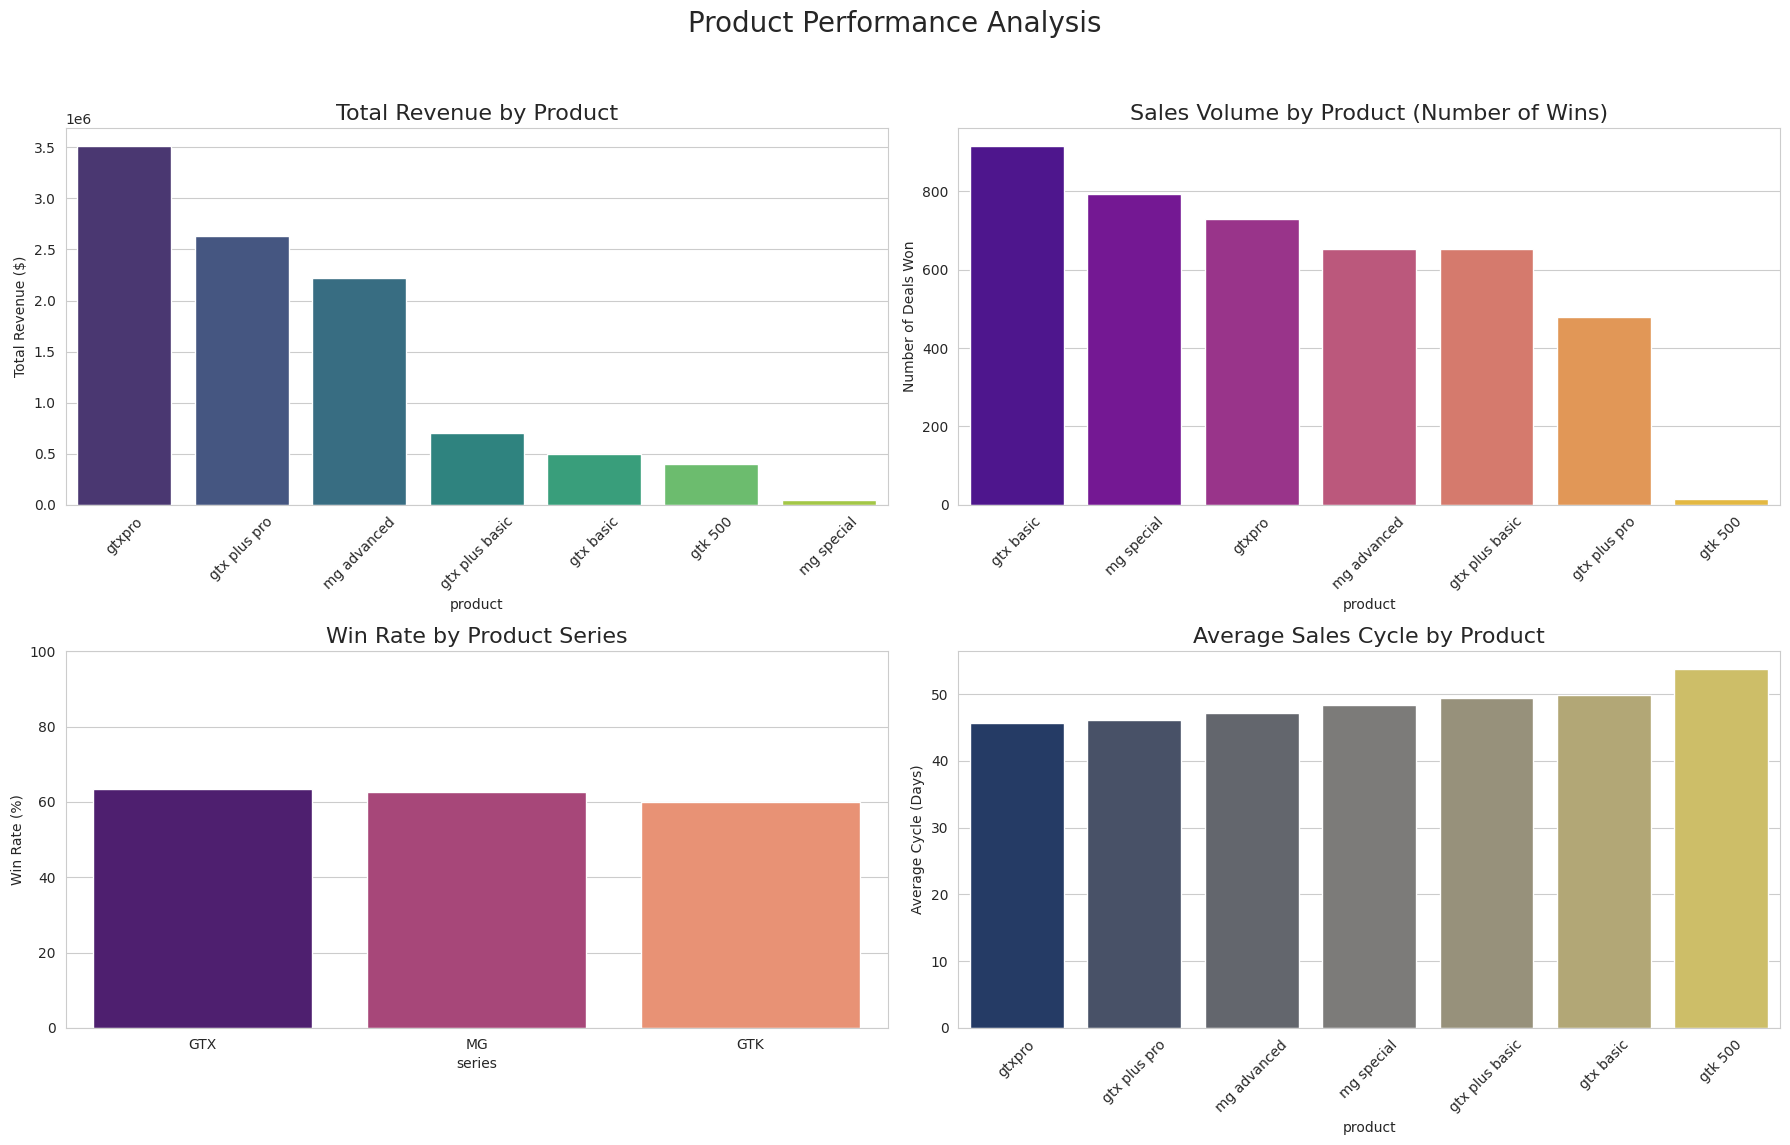

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(18, 12)) # Create a 2x2 grid of plots
fig.suptitle('Product Performance Analysis', fontsize=20)

# 1. Total Revenue by Product
sns.barplot(ax=axes[0, 0], x=product_revenue.index, y=product_revenue.values, palette='viridis')
axes[0, 0].set_title('Total Revenue by Product', fontsize=16)
axes[0, 0].set_ylabel('Total Revenue ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Sales Volume by Product
sns.barplot(ax=axes[0, 1], x=product_volume.index, y=product_volume.values, palette='plasma')
axes[0, 1].set_title('Sales Volume by Product (Number of Wins)', fontsize=16)
axes[0, 1].set_ylabel('Number of Deals Won')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Win Rate by Product Series
sns.barplot(ax=axes[1, 0], x=win_rate_by_series.index, y=win_rate_by_series.values, palette='magma')
axes[1, 0].set_title('Win Rate by Product Series', fontsize=16)
axes[1, 0].set_ylabel('Win Rate (%)')
axes[1, 0].set_ylim(0, 100) # Win rate is a percentage

# 4. Average Sales Cycle by Product
sns.barplot(ax=axes[1, 1], x=product_cycle_time.index, y=product_cycle_time.values, palette='cividis')
axes[1, 1].set_title('Average Sales Cycle by Product', fontsize=16)
axes[1, 1].set_ylabel('Average Cycle (Days)')
axes[1, 1].tick_params(axis='x', rotation=45)

# Display all the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

In [ ]:
# 3 CUSTOMER & MARKET ANALYSIS
# Which accounts are our most valuable customers?
top_accounts = won.groupby('account')['close_value'].sum().sort_values(ascending=False).head(5)
print("\n--- Top 5 Most Valuable Accounts (by Revenue) ---")
print(top_accounts)

# Which accounts are easiest to win?
win_rate_by_account = master_closed.groupby('account')['deal_stage'].apply(lambda x: (x == 'Won').sum() / len(x) * 100).sort_values(ascending=False)
print("\n--- Account Win Rate ---")
print(win_rate_by_account.map('{:.2f}%'.format))

# Which sectors are most profitable?
sector_profit = won.groupby('sector')['close_value'].sum().sort_values(ascending=False)
print("\n--- Total Revenue by Sector ---")
print(sector_profit)

# Do larger companies result in larger deal sizes?
# We can check the correlation between employee count and close value
correlation = won[['employees', 'revenue', 'close_value']].corr()
print("\n--- Correlation between Company Size and Deal Value ---")
print(correlation)
print("Insight: A value close to 1.0 indicates a strong positive correlation.")

# Which company takes more time to make a deal?
account_deal_time = master_closed.groupby('account')[['sales_cycle_days', 'close_value']].mean().sort_values(by='sales_cycle_days', ascending=False)
print("\n--- Average Deal Time and Value by Account ---")
print(account_deal_time)



--- Top 5 Most Valuable Accounts (by Revenue) ---
account
kan-code    341455.0
konex       269245.0
condax      206410.0
cheers      198020.0
hottechi    194957.0
Name: close_value, dtype: float64

--- Account Win Rate ---
account
rangreen        75.00%
goodsilron      73.86%
newex           72.55%
plusstrip       71.74%
zoomit          71.74%
                 ...  
sumace          56.10%
donware         55.56%
silis           55.56%
xx-zobam        55.42%
statholdings    53.12%
Name: deal_stage, Length: 85, dtype: object

--- Total Revenue by Sector ---
sector
retail                1867528.0
technolgy             1515487.0
medical               1359595.0
software              1077934.0
finance                950908.0
marketing              922321.0
entertainment          689007.0
telecommunications     653574.0
services               533006.0
employment             436174.0
Name: close_value, dtype: float64

--- Correlation between Company Size and Deal Value ---
             employe

/tmp/ipython-input-2340894846.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], y=top_accounts.index, x=top_accounts.values, palette='Blues_r', orient='h')
/tmp/ipython-input-2340894846.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], x=sector_profit.index, y=sector_profit.values, palette='Oranges_r')
/tmp/ipython-input-2340894846.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_tier_value = won.groupby('company_size_tier')['close_value'].mean().sort_values

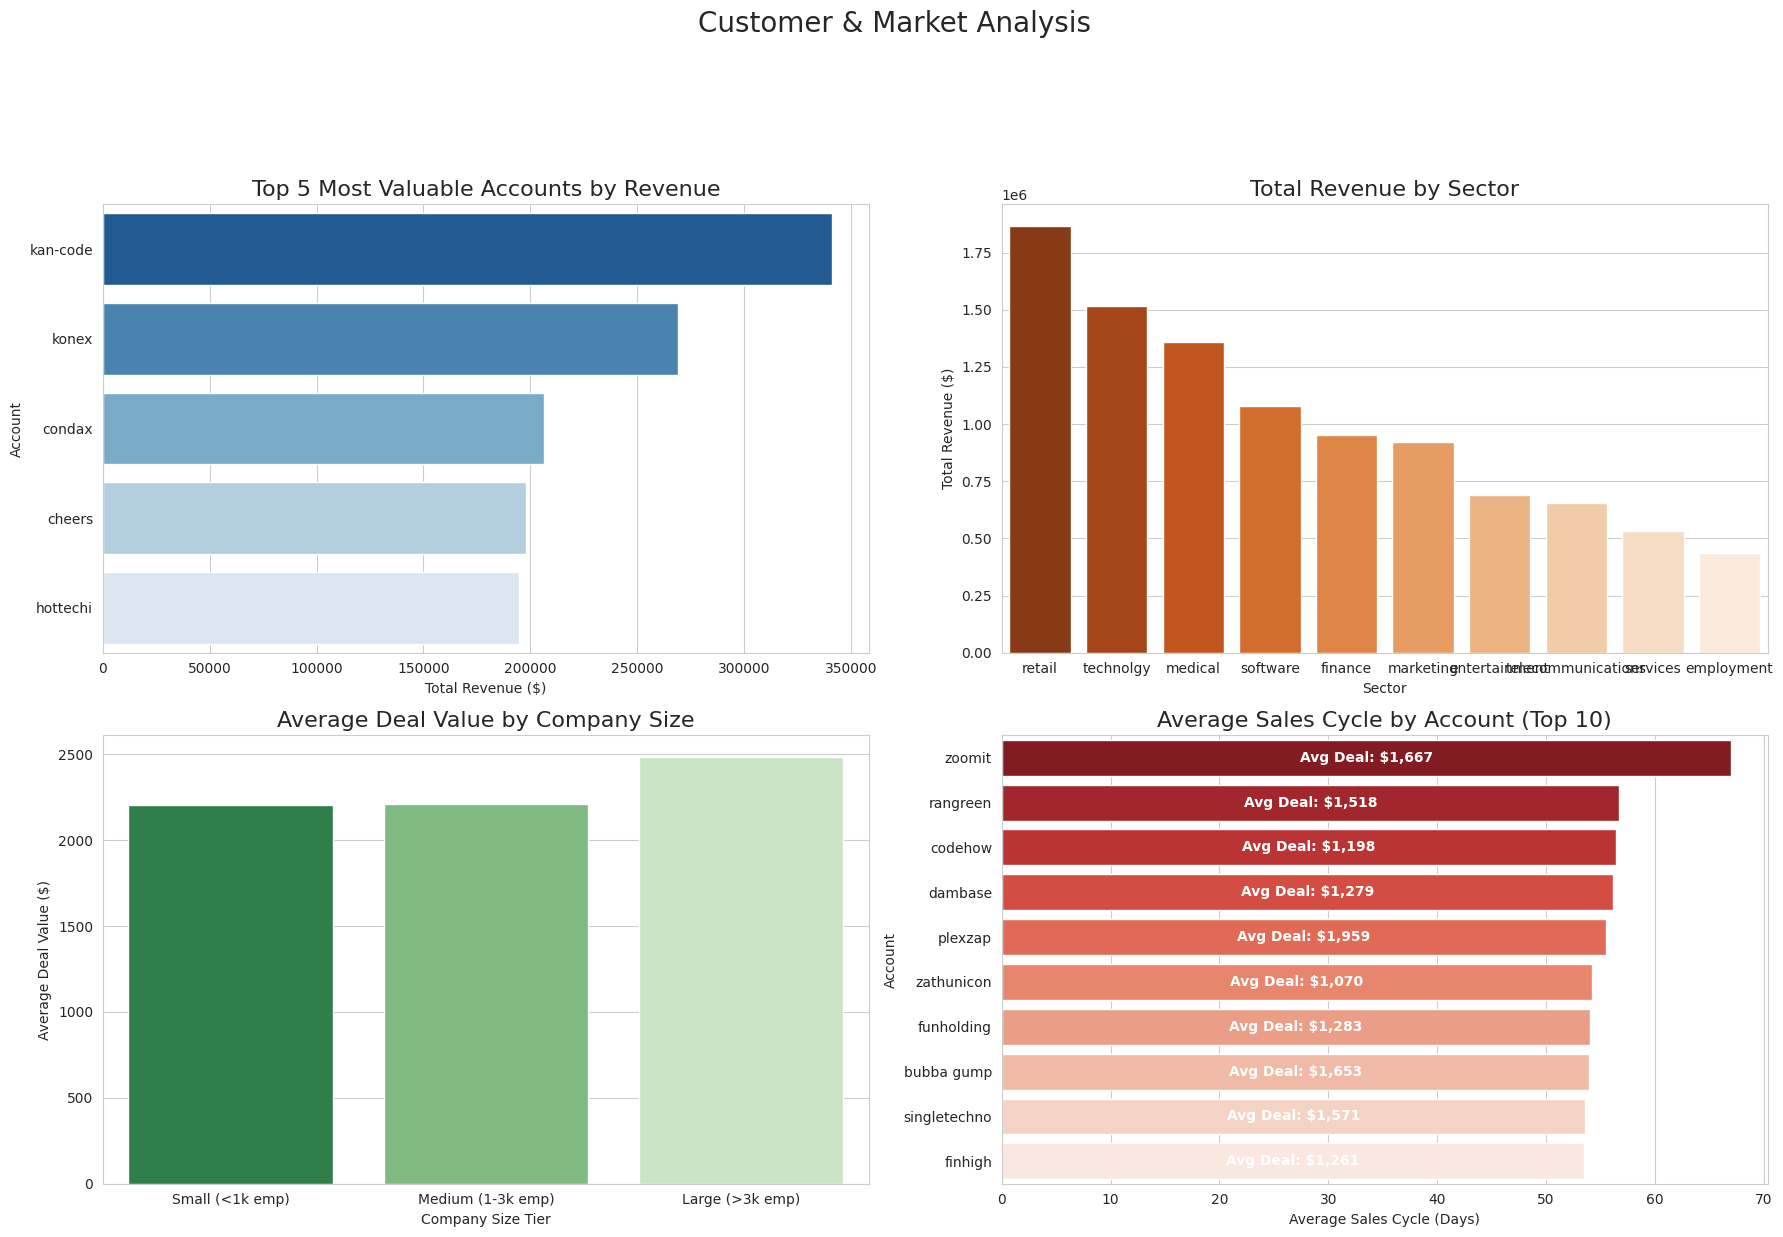

In [ ]:
# --- Visualizations ---
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Customer & Market Analysis', fontsize=20)

# 1. Top 5 Most Valuable Accounts
sns.barplot(ax=axes[0, 0], y=top_accounts.index, x=top_accounts.values, palette='Blues_r', orient='h')
axes[0, 0].set_title('Top 5 Most Valuable Accounts by Revenue', fontsize=16)
axes[0, 0].set_xlabel('Total Revenue ($)')
axes[0, 0].set_ylabel('Account')

# 2. Total Revenue by Sector
sns.barplot(ax=axes[0, 1], x=sector_profit.index, y=sector_profit.values, palette='Oranges_r')
axes[0, 1].set_title('Total Revenue by Sector', fontsize=16)
axes[0, 1].set_ylabel('Total Revenue ($)')
axes[0, 1].set_xlabel('Sector')

# --- Plot 3: Company Size vs. Average Deal Value (Bar Chart) ---
# Create bins for company size
bins = [0, 1000, 3000, 10000]
labels = ['Small (<1k emp)', 'Medium (1-3k emp)', 'Large (>3k emp)']
# Use observed=False to maintain all categories even if some are empty
won['company_size_tier'] = pd.cut(won['employees'], bins=bins, labels=labels, right=False)
size_tier_value = won.groupby('company_size_tier')['close_value'].mean().sort_values(ascending=False)

sns.barplot(ax=axes[1, 0], x=size_tier_value.index, y=size_tier_value.values, palette='Greens_r')
axes[1, 0].set_title('Average Deal Value by Company Size', fontsize=16)
axes[1, 0].set_xlabel('Company Size Tier')
axes[1, 0].set_ylabel('Average Deal Value ($)')


# --- Plot 4: Average Sales Cycle by Account (Horizontal Bar Chart) ---
# Sort by sales cycle days for a clean look
account_deal_time_sorted = account_deal_time.sort_values('sales_cycle_days', ascending=False).head(10) # Displaying top 10 for clarity
sns.barplot(ax=axes[1, 1], y=account_deal_time_sorted.index, x=account_deal_time_sorted['sales_cycle_days'], palette='Reds_r', orient='h')
axes[1, 1].set_title('Average Sales Cycle by Account (Top 10)', fontsize=16)
axes[1, 1].set_xlabel('Average Sales Cycle (Days)')
axes[1, 1].set_ylabel('Account')

# Add the average deal value as a clean annotation on each bar
for index, (account, row) in enumerate(account_deal_time_sorted.iterrows()):
    axes[1, 1].text(row['sales_cycle_days'] / 2, index, f'Avg Deal: ${row["close_value"]:,.0f}',
                 color='white', ha='center', va='center', fontweight='bold')


plt.tight_layout(rect=[0, 0.1, 1, 0.9])
plt.show()

In [ ]:
# 4 SALES TEAM & AGENT EFFICIENCY ANALYSIS
# Who are the top-performing sales agents by revenue?
agent_revenue = won.groupby('sales_agent')['close_value'].sum().sort_values(ascending=False)
print("\n--- Top Sales Agents by Revenue ---")
print(agent_revenue)

# Win Rate by Sales Agent and Manager
agent_win_rate = master_closed.groupby(['manager', 'sales_agent'])['deal_stage'].apply(lambda x: (x == 'Won').sum() / len(x) * 100).sort_values(ascending=False)
print("\n--- Win Rate by Manager and Sales Agent ---")
print(agent_win_rate.map('{:.2f}%'.format))

# Average deal time taken by each manager's team
manager_deal_time = master_closed.groupby('manager')['sales_cycle_days'].mean().sort_values()
print("\n--- Average Sales Cycle by Manager ---")
print(manager_deal_time)

# Performance by Regional Office (Revenue and Win Rate)
office_revenue = won.groupby('regional_office')['close_value'].sum().sort_values(ascending=False)
print("\n--- Total Revenue by Regional Office ---")
print(office_revenue)

office_win_rate = master_closed.groupby('regional_office')['deal_stage'].apply(lambda x: (x == 'Won').sum() / len(x) * 100).sort_values(ascending=False)
print("\n--- Win Rate by Regional Office ---")
print(office_win_rate.map('{:.2f}%'.format))



--- Top Sales Agents by Revenue ---
sales_agent
darcel schlecht       1153214.0
vicki laflamme         478396.0
kary hendrixson        454298.0
cassey cress           450489.0
donn cantrell          445860.0
reed clapper           438336.0
zane levy              430068.0
corliss cosme          421036.0
james ascencio         413533.0
daniell hammack        364229.0
maureen marcano        350395.0
gladys colclough       345674.0
markita hansen         328792.0
kami bicknell          316456.0
marty freudenburg      291195.0
elease gluck           289195.0
jonathan berthelot     284886.0
anna snelling          275056.0
hayden neloms          272111.0
boris faz              261631.0
rosalina dieter        235403.0
rosie papadopoulos     230169.0
cecily lampkin         229800.0
moses frase            207182.0
garret kinder          197773.0
lajuana vencill        194632.0
versie hillebrand      187693.0
niesha huffines        176961.0
wilburn farren         157640.0
violet mclelland       

/tmp/ipython-input-3422881878.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], x=manager_win_rate.index, y=manager_win_rate.values, palette='crest')
/tmp/ipython-input-3422881878.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 0], x=manager_deal_time.index, y=manager_deal_time.values, palette='crest')
/tmp/ipython-input-3422881878.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 1], x=office_revenue.index, y=office_revenue.values, palette='rocket')


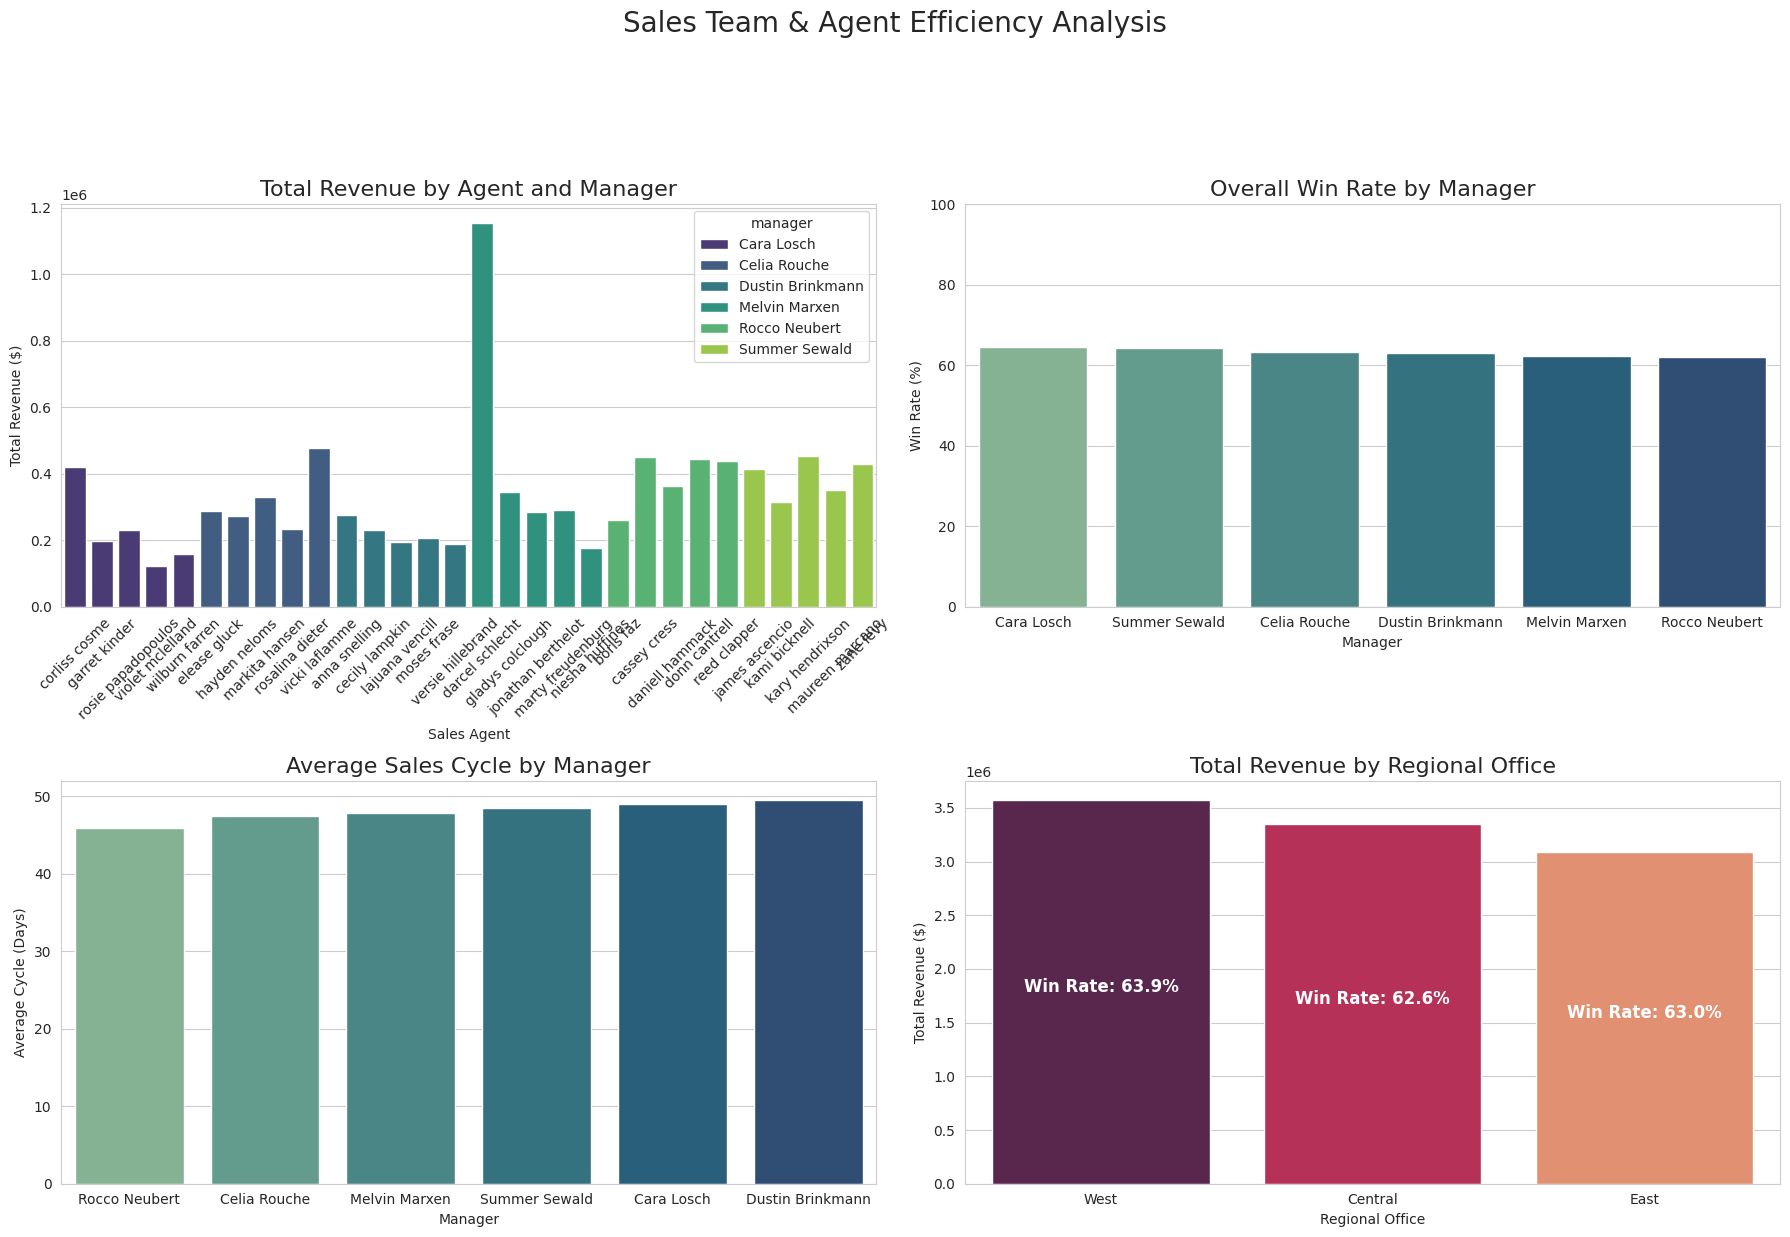

In [ ]:
# --- Visualizations ---
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Sales Team & Agent Efficiency Analysis', fontsize=20)

# --- Plot 1 (Revised): Total Revenue by Agent, Grouped by Manager ---
# Calculate revenue grouped by both manager and agent
manager_agent_revenue = won.groupby(['manager', 'sales_agent'])['close_value'].sum().reset_index()

sns.barplot(ax=axes[0, 0], data=manager_agent_revenue, x='sales_agent', y='close_value', hue='manager', palette='viridis')
axes[0, 0].set_title('Total Revenue by Agent and Manager', fontsize=16)
axes[0, 0].set_xlabel('Sales Agent')
axes[0, 0].set_ylabel('Total Revenue ($)')
axes[0, 0].tick_params(axis='x', rotation=45)


# --- Plot 2 (Revised): Win Rate by Manager ---
# Calculate win rate at the manager level
manager_win_rate = master_closed.groupby('manager')['deal_stage'].apply(lambda x: (x == 'Won').sum() / len(x) * 100).sort_values(ascending=False)

sns.barplot(ax=axes[0, 1], x=manager_win_rate.index, y=manager_win_rate.values, palette='crest')
axes[0, 1].set_title('Overall Win Rate by Manager', fontsize=16)
axes[0, 1].set_xlabel('Manager')
axes[0, 1].set_ylabel('Win Rate (%)')
axes[0, 1].set_ylim(0, 100) # Set y-axis limit for percentage


# 3. Average Sales Cycle by Manager
sns.barplot(ax=axes[1, 0], x=manager_deal_time.index, y=manager_deal_time.values, palette='crest')
axes[1, 0].set_title('Average Sales Cycle by Manager', fontsize=16)
axes[1, 0].set_xlabel('Manager')
axes[1, 0].set_ylabel('Average Cycle (Days)')

# 4. Performance by Regional Office
# We'll plot revenue and add win rate as an annotation
sns.barplot(ax=axes[1, 1], x=office_revenue.index, y=office_revenue.values, palette='rocket')
axes[1, 1].set_title('Total Revenue by Regional Office', fontsize=16)
axes[1, 1].set_xlabel('Regional Office')
axes[1, 1].set_ylabel('Total Revenue ($)')

# Add win rate annotations
for i, office in enumerate(office_revenue.index):
    rate = office_win_rate.get(office, 0)
    axes[1, 1].text(i, office_revenue.values[i] / 2, f'Win Rate: {rate:.1f}%',
                     ha='center', color='white', fontsize=12, fontweight='bold')


plt.tight_layout(rect=[0, 0.1, 1, 0.9])
plt.show()